## Import Libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
rcParams['axes.titlepad'] = 20
rcParams.update({'figure.autolayout': True})
sns.reset_defaults()
sns.set_context('poster')
sns.set_style('darkgrid')

## Define Functions

In [64]:
def findPercentile(data, percentiles):
    # data should be 2d array, percentile
    percentileVals = {percent:[] for percent in percentiles}
    for i in range(data.shape[1]):
        valsOrdered = sorted([data[row][i] for row in range(data.shape[0])])
        for percent in percentiles:
            index = int(percent / 100. * len(valsOrdered))
            percentileVals[percent].append(valsOrdered[index])
    return percentileVals
            
        

def plotScoreDist(data, moving=1, save=True, filename=None):
    # data should be 2d array, moving is integer if want distribution
    # for n-moving average of scores
    
    movingData = []
    for row in data:
        movingData.append([row[i:i+moving][0] for i in range(len(row))])
    movingData = np.array(movingData)
    
    means = np.mean(movingData, axis=0)
    
    percentDict = findPercentile(movingData, [25, 50, 75])
    perc25 = percentDict[25]
    perc50 = percentDict[50]
    perc75 = percentDict[75]
    
    plt.plot(range(data.shape[1]), perc50, color='b')
    plt.fill_between(range(data.shape[1]), perc25, perc75, color='b', alpha=.4)
    if save and filename is not None:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
        
        

## Score Distributions

### GridWorld

#### Map 0

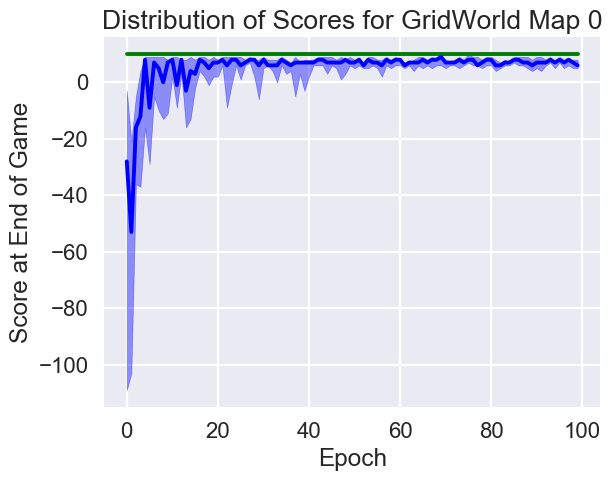

In [65]:
# Map0, p = [0,1,0], gamma=.9, alpha=.1, alpha_dec=.99, 20 times 100 epochs
gw1 = np.load('gridworld/results/gridworld1.npy')
plt.plot(range(gw1.shape[1]), [10] * gw1.shape[1], color='g')
plt.title("Distribution of Scores for GridWorld Map 0")
plt.ylabel("Score at End of Game")
plt.xlabel("Epoch")
plotScoreDist(gw1, save=True, filename='gridworld/figs/scores_map0_1.pdf')

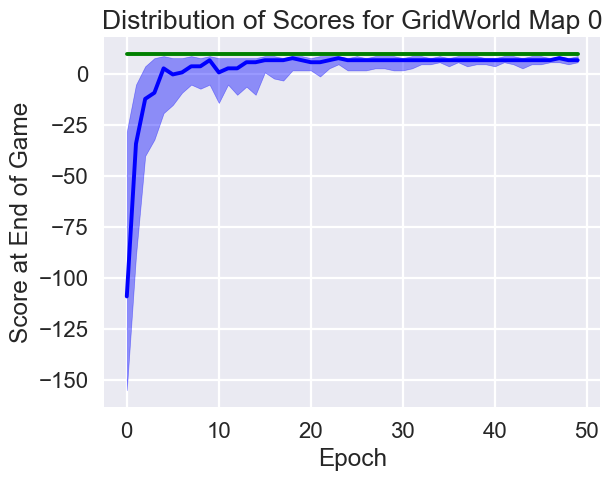

In [67]:
# Map0, p = [0,1,0], gamma=.9, alpha=.1, alpha_dec=.99, 100 times 50 epochs
gw2 = np.load('gridworld/results/gridworld2.npy')
plt.plot(range(gw2.shape[1]), [10] * gw2.shape[1], color='g')
plt.title("Distribution of Scores for GridWorld Map 0")
plt.ylabel("Score at End of Game")
plt.xlabel("Epoch")
plotScoreDist(gw2, save=True, filename='gridworld/figs/scores_map0_2.pdf')

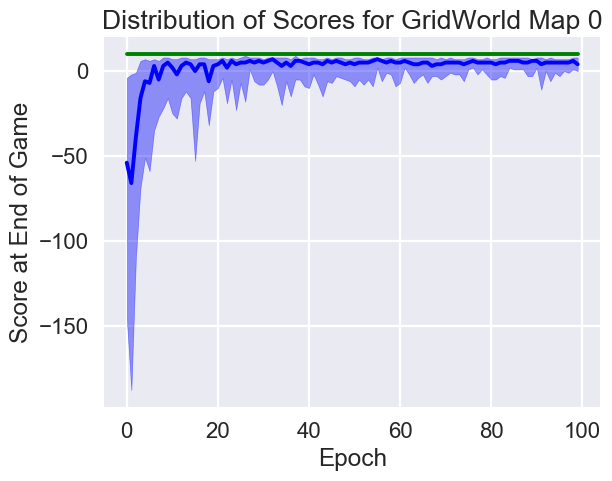

In [69]:
# Map0, p = [.1,.8,.1], gamma=.9, alpha=.1, alpha_dec=.99, 100 times 100 epochs
gw4 = np.load('gridworld/results/gridworld4.npy')
plt.plot(range(gw4.shape[1]), [10] * gw4.shape[1], color='g')
plt.title("Distribution of Scores for GridWorld Map 0")
plt.ylabel("Score at End of Game")
plt.xlabel("Epoch")
plotScoreDist(gw4, save=True, filename='gridworld/figs/scores_map0_4.pdf')

#### Map 1

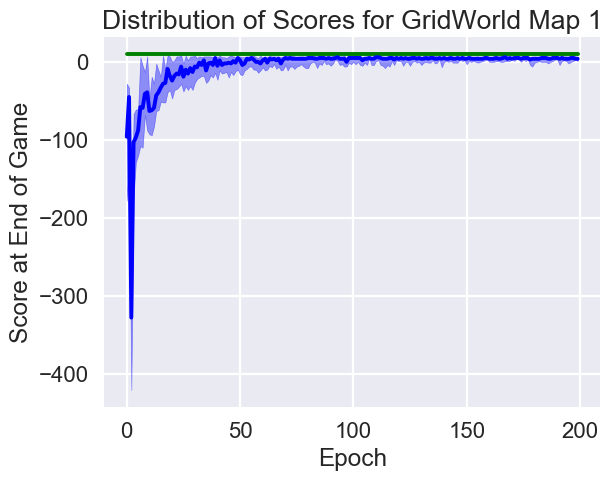

In [68]:
# Map 1, p = [0,1,0], gamma=.9, alpha=.1, alpha_dec=.99, 50 times 200 epochs
gw3 = np.load('gridworld/results/gridworld3.npy')
plt.plot(range(gw3.shape[1]), [10] * gw3.shape[1], color='g')
plt.title("Distribution of Scores for GridWorld Map 1")
plt.ylabel("Score at End of Game")
plt.xlabel("Epoch")
plotScoreDist(gw3, save=True, filename='gridworld/figs/scores_map1_1.pdf')